# Results from mice behaviour analysis

Import libraries

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mice_behav_analysis as mba
from mice_behav_analysis import *
import warnings
warnings.filterwarnings('ignore')

Data loading

In [2]:
PATH = '/Users/leyre/Dropbox/mice_data/standard_training_2020'
SV_FOLDER = '/Users/leyre/Dropbox/mice_data/standard_training_2020'
#PATH = '/home/manuel/mice_data/standard_training_2020'
#SV_FOLDER = '/home/manuel/mice_data/standard_training_2020'
dataset = 'global_trials'  # global_trials-minitrials
df_params = pd.read_csv(PATH + '/global_params.csv', sep=';')
df_trials = pd.read_csv(PATH + '/'+dataset+'.csv', sep=';', low_memory=False)
subj_unq = np.unique(df_params.subject_name)
COLORS = sns.color_palette("mako", n_colors=3)
COLORS_qlt = sns.color_palette("tab10", n_colors=80)
matplotlib.rcParams['font.size'] = 8
# matplotlib.rcParams['font.family'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

### Accuracy across sessions

ValueError: x and y must have same first dimension, but have shapes (14,) and (13,)

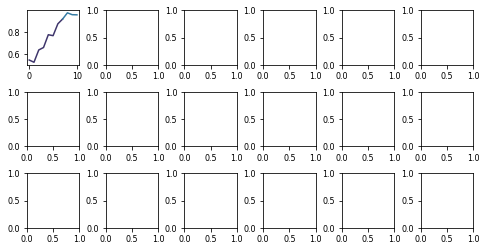

In [3]:
plot_final_acc_session_subj(subj_unq, df_params)

### Mean accuracy at stage change

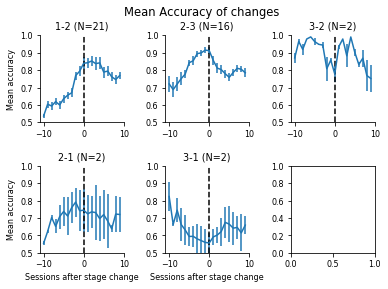

In [4]:
prev_w = 10
nxt_w = 10
mat_mean_perfs, mat_std_perfs, num_samples = accuracy_at_stg_change(df_params,
                                                                    subj_unq,
                                                                    prev_w=prev_w,
                                                                    nxt_w=nxt_w)
plot_means_std(mat_mean_perfs, mat_std_perfs, num_samples, prev_w=prev_w, nxt_w=nxt_w)

### Accuracy over trials for each subject 

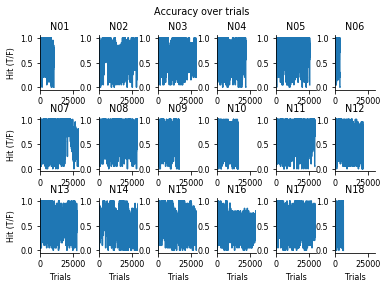

In [6]:
plot_trials_subjects(df_trials, conv_w=20)

### Trials accuracy of all the subjects

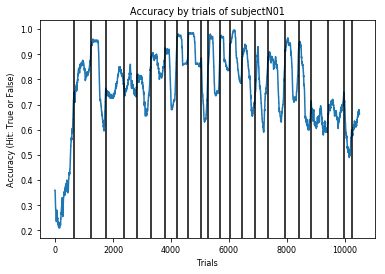

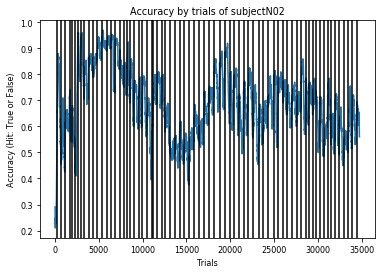

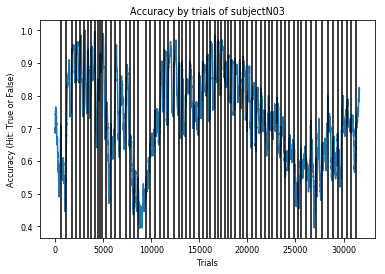

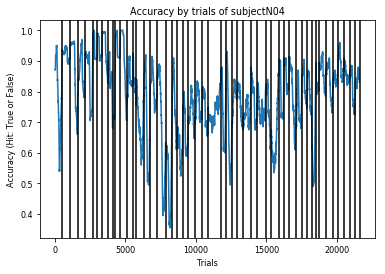

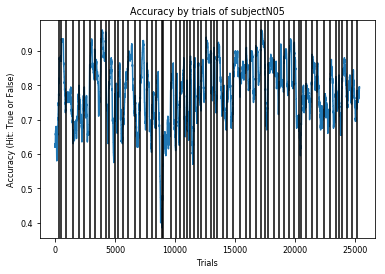

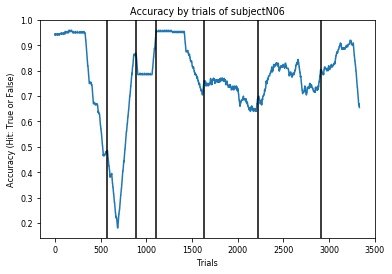

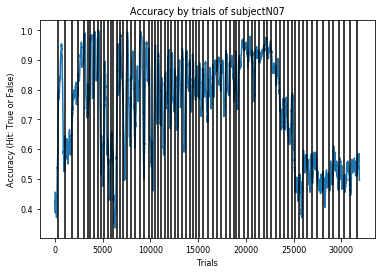

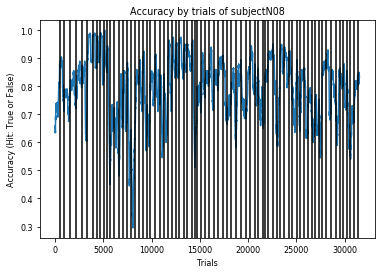

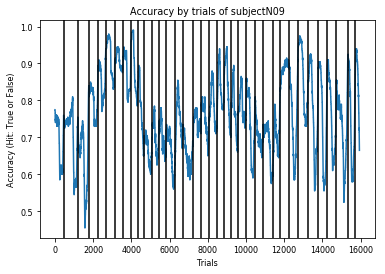

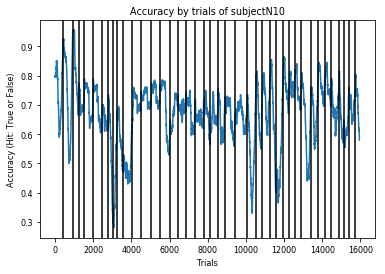

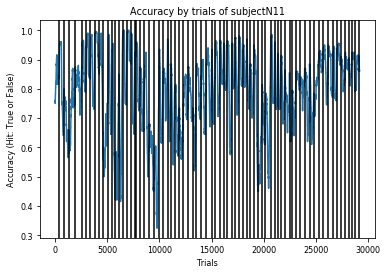

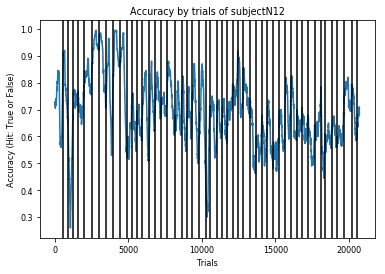

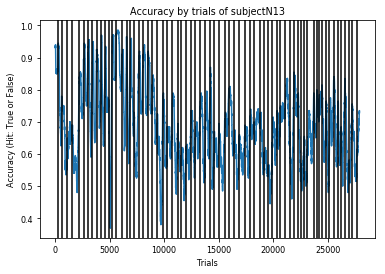

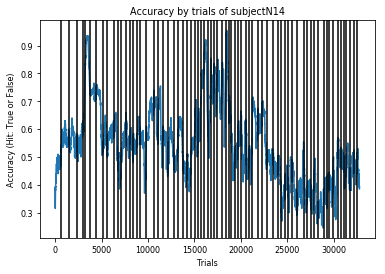

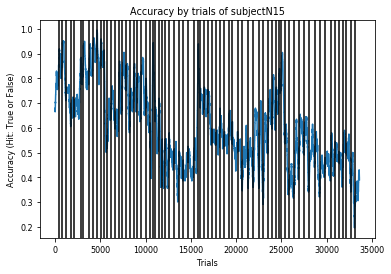

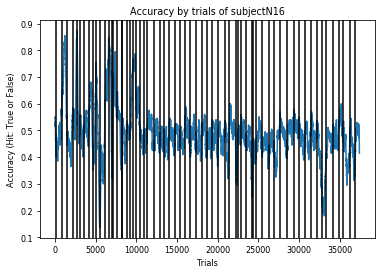

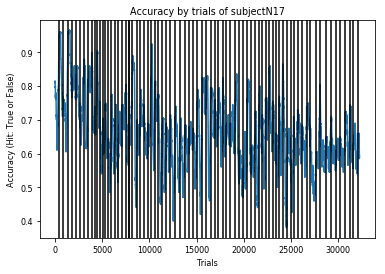

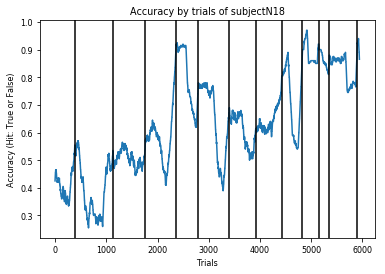

In [7]:
for i_s, sbj in enumerate(subj_unq):
    df_sbj_perf = concatenate_trials(df_trials, sbj)
    plot_trials_subj(df_trials, sbj, df_sbj_perf, conv_w=200)

### plot the same having into account the misses

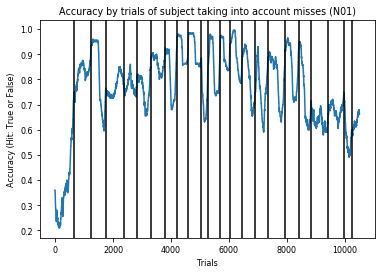

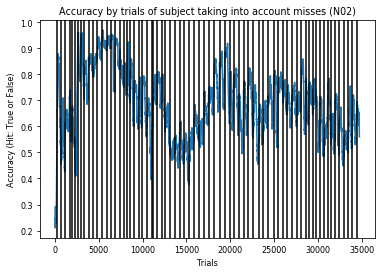

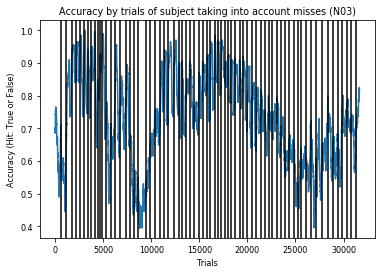

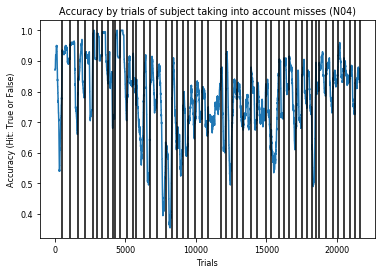

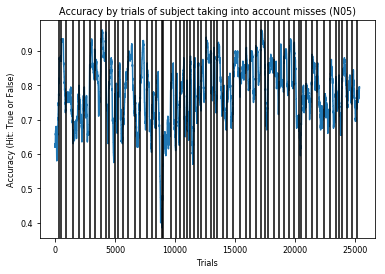

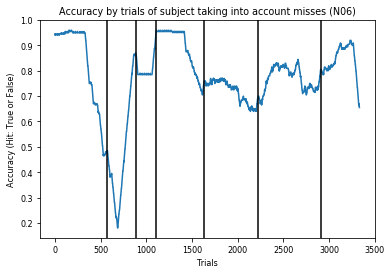

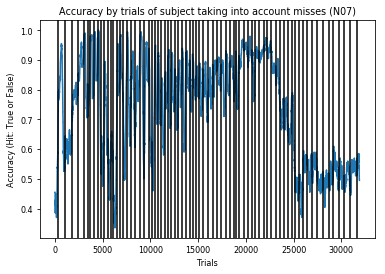

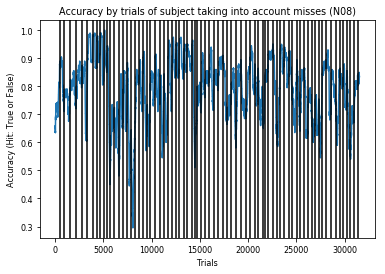

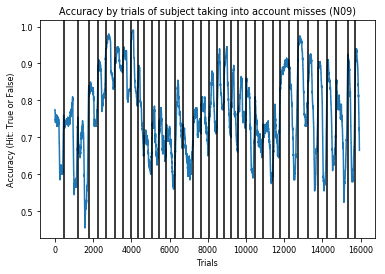

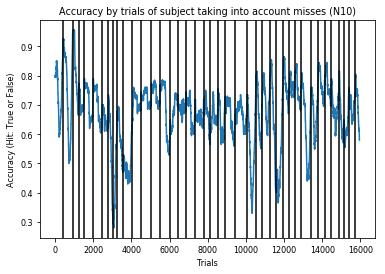

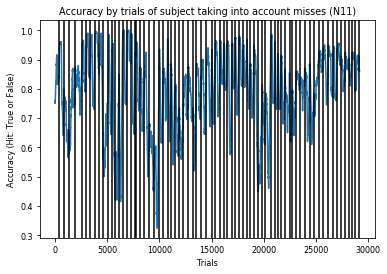

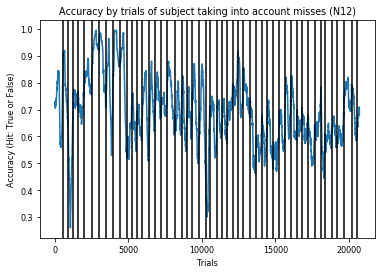

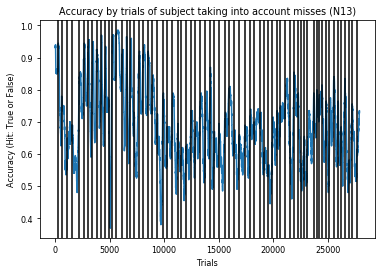

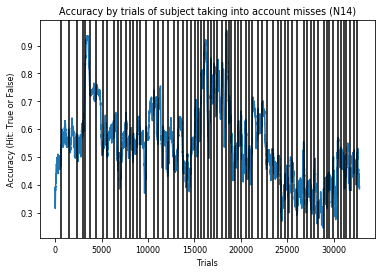

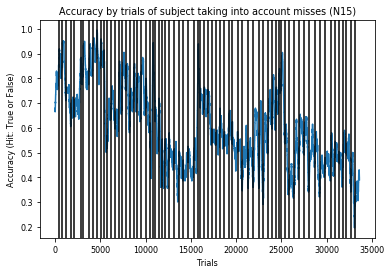

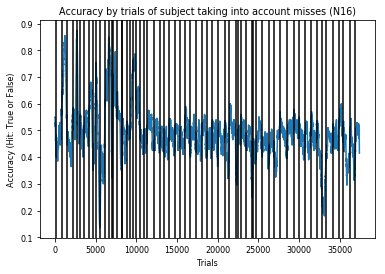

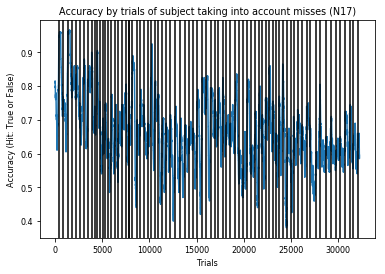

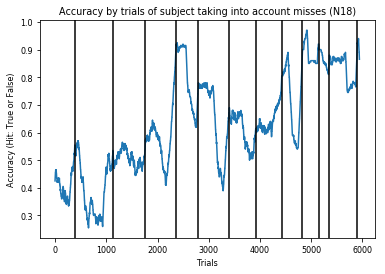

In [8]:
# Remove misses
df_trials_without_misses = remove_misses(df_trials)
# Plot it
for i_s, sbj in enumerate(subj_unq):
    df_sbj_perf = concatenate_trials(df_trials_without_misses, sbj)
    plot_trials_subj_misses(df_trials_without_misses, sbj, df_sbj_perf, conv_w=200)

### Plot only the misses

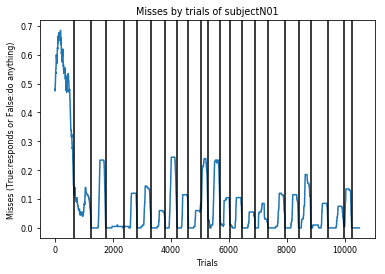

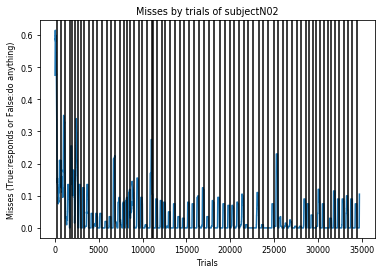

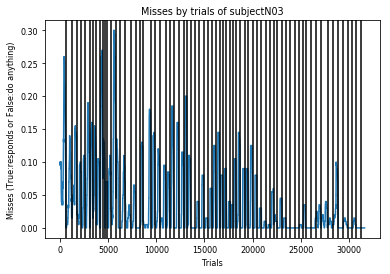

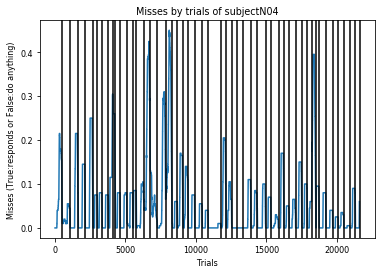

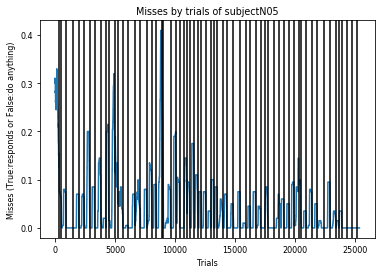

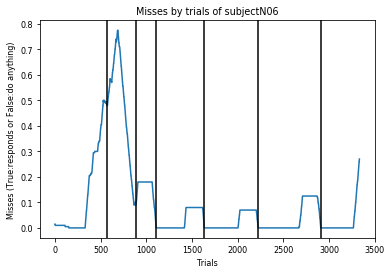

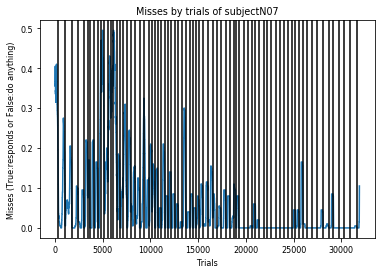

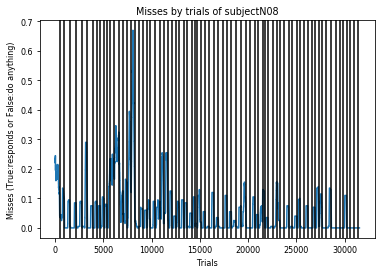

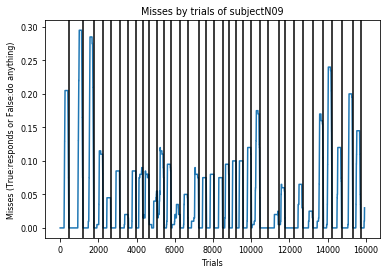

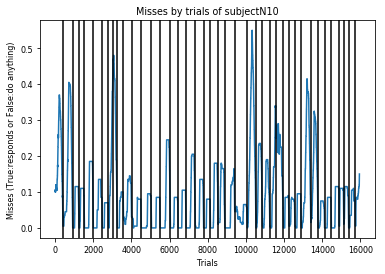

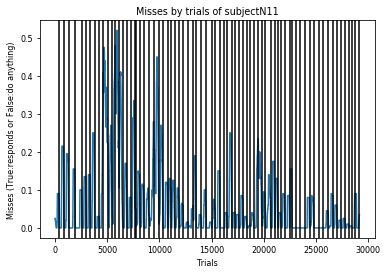

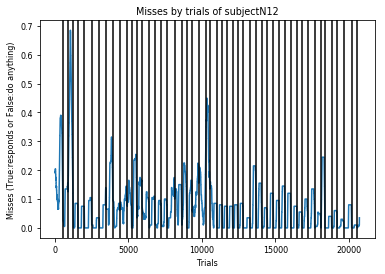

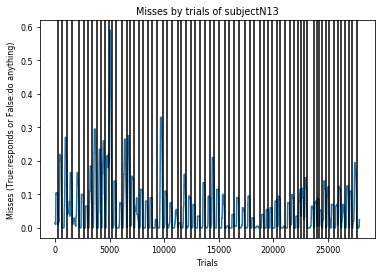

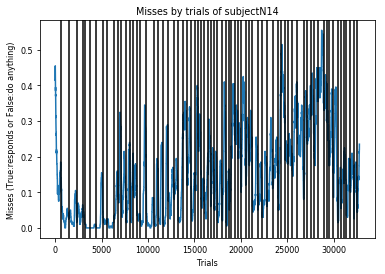

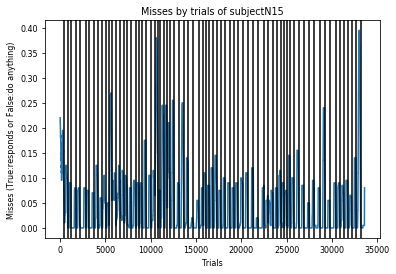

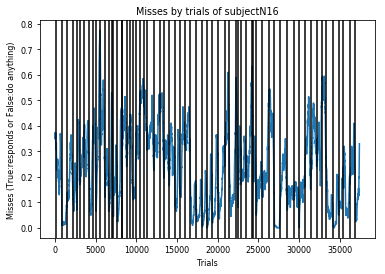

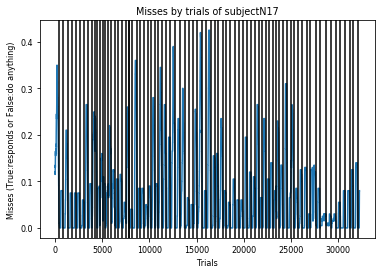

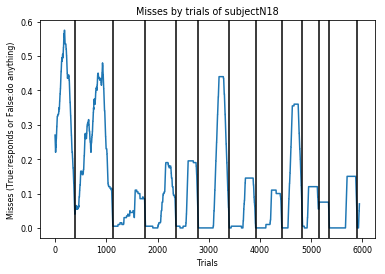

In [9]:
for i_s, sbj in enumerate(subj_unq):
    df_sbj_perf = concatenate_misses(df_trials, sbj)
    plot_misses_subj(df_trials, sbj, df_sbj_perf, conv_w=200)

### Plot motor and delay variables

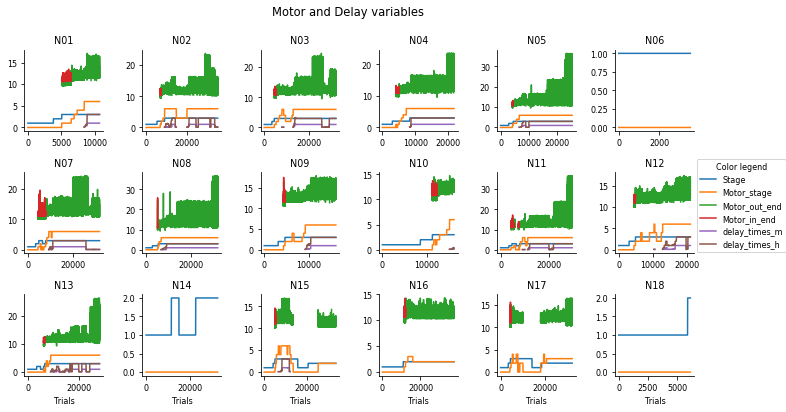

In [11]:
plot_final_stage_motor_delay(subj_unq, df=df_trials, df_prms=df_params)